In [1]:
import pandas as pd
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
data=pd.read_csv(r"C:\Users\Yuthayakarthick\Downloads\data_dog.csv")
df=data.drop(['EXTERNAL_PATIENT_ID','ALGORITHM_UUID','ACTIVITY_DAY',
            'ALGORITHM_MASTER_ID','ALGORITHM_NAME',
            'ALGORITHM_VERSION','STUDY_NAME',
            'STUDY_WEEK','GEN_UUID','DEVICE_ID','ACTIVITY_START_TIME','ACTIVITY_END_TIME','ACTIVITY_DURATION_SEC'],axis=1)
df

,PET_ID,STUDY_ID,ACTIVITY,ACTIVITY_DURATION_MIN,ACTIVITY_DURATION_HR
0,3960,2907,Resting,1.250000,0.020833
1,3256,1883,Walking,30.100000,0.501667
2,3884,1883,GAP,54.850000,0.914170
3,4556,2923,Sleep,2.900000,0.048333
4,3252,1883,Resting,1.983333,0.033056
...,...,...,...,...,...
4995,3909,2905,Resting,0.033333,0.000556
4996,3909,2905,Running,0.033333,0.000556
4997,3909,2905,Walking,0.033333,0.000556
4998,3909,2905,Walking,0.033333,0.000556


In [2]:
print(df['ACTIVITY'].unique())

['Resting' 'Walking' 'GAP' 'Sleep' 'Running' 'Charge' 'NODATA'
 'Scratching' 'Shaking']


In [3]:
df1=df.loc[data.ACTIVITY =='Resting']
df2=df.loc[data.ACTIVITY =='Walking']
df3=df.loc[data.ACTIVITY =='GAP']
df4=df.loc[data.ACTIVITY =='Sleep']
df5=df.loc[data.ACTIVITY =='Running']
df6=df.loc[data.ACTIVITY =='Charge']
df7=df.loc[data.ACTIVITY =='Scratching']
df8=df.loc[data.ACTIVITY =='Shaking']
print("the mean of Resting    :",df1['ACTIVITY_DURATION_MIN'].mean())
print("the mean of Walking    :",df2['ACTIVITY_DURATION_MIN'].mean())
print("the mean of GAP        :",df3['ACTIVITY_DURATION_MIN'].mean())
print("the mean of Sleep      :",df4['ACTIVITY_DURATION_MIN'].mean())
print("the mean of Running    :",df5['ACTIVITY_DURATION_MIN'].mean())
print("the mean of Charge     :",df6['ACTIVITY_DURATION_MIN'].mean())
print("the mean of Scratching :",df7['ACTIVITY_DURATION_MIN'].mean())
print("the mean of Shaking    :",df8['ACTIVITY_DURATION_MIN'].mean())

the mean of Resting    : 2.301518027793934
the mean of Walking    : 2.0874039365781183
the mean of GAP        : 13.593136470588231
the mean of Sleep      : 49.60074626414787
the mean of Running    : 0.45089743562307827
the mean of Charge     : 578.716667334
the mean of Scratching : 0.03333333299999995
the mean of Shaking    : 0.03333333300000002


In [4]:
# Resting=df1.loc[data.ACTIVITY_DURATION_MIN >=600]
# Walking=df2.loc[data.ACTIVITY_DURATION_MIN >=120]
# GAP=df3.loc[data.ACTIVITY_DURATION_MIN >=600]
Sleep=df4.loc[data.ACTIVITY_DURATION_MIN >=600]
# Running=df5.loc[data.ACTIVITY_DURATION_MIN >=120]
# Charge=df6.loc[data.ACTIVITY_DURATION_MIN >=600]
# Scratching=df7.loc[data.ACTIVITY_DURATION_MIN >=120]
# Shaking=df8.loc[data.ACTIVITY_DURATION_MIN >=600]

<AxesSubplot:title={'center':'the outlier of Sleeping  600 min'}>

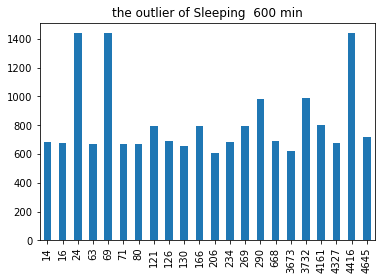

In [5]:
Sleep['ACTIVITY_DURATION_MIN'].plot(kind='bar',title="the outlier of Sleeping  600 min")
# Walking['ACTIVITY_DURATION_MIN'].plot(kind='bar')
# GAP['ACTIVITY_DURATION_MIN'].plot(kind='bar')
# Sleep['ACTIVITY_DURATION_MIN'].plot(kind='bar')
# Running['ACTIVITY_DURATION_MIN'].plot(kind='bar')
# Charge['ACTIVITY_DURATION_MIN'].plot(kind='bar')
# Scratching['ACTIVITY_DURATION_MIN'].plot(kind='bar')
# Shaking['ACTIVITY_DURATION_MIN'].plot(kind='bar')


In [6]:
m = df4['ACTIVITY_DURATION_MIN'].mean()
dfnew = Sleep['ACTIVITY_DURATION_MIN'].replace(to_replace=list(Sleep['ACTIVITY_DURATION_MIN']),value=m)


In [7]:
dfnew

14      49.600746
16      49.600746
24      49.600746
63      49.600746
69      49.600746
71      49.600746
80      49.600746
121     49.600746
126     49.600746
130     49.600746
166     49.600746
206     49.600746
234     49.600746
269     49.600746
290     49.600746
668     49.600746
3673    49.600746
3732    49.600746
4161    49.600746
4327    49.600746
4416    49.600746
4645    49.600746
Name: ACTIVITY_DURATION_MIN, dtype: float64

In [15]:
# df.loc[(df.ACTIVITY == 'Resting') & (df.ACTIVITY_DURATION_MIN >=600)]
# df.loc[(df.ACTIVITY == 'Walking') & (df.ACTIVITY_DURATION_MIN >=600)]
# df.loc[(df.ACTIVITY == 'GAP') & (df.ACTIVITY_DURATION_MIN >=600)]
df.loc[(df.ACTIVITY == 'Sleep') & (df.ACTIVITY_DURATION_MIN >=600)]
# df.loc[(df.ACTIVITY == 'Running') & (df.ACTIVITY_DURATION_MIN >=600)]
# df.loc[(df.ACTIVITY == 'Charge') & (df.ACTIVITY_DURATION_MIN >=600)]
# df.loc[(df.ACTIVITY == 'Scratching') & (df.ACTIVITY_DURATION_MIN >=600)]
# df.loc[(df.ACTIVITY == 'Shaking') & (df.ACTIVITY_DURATION_MIN >=600)]
Sleep.loc[Sleep["ACTIVITY_DURATION_MIN"]>600,'ACTIVITY_DURATION_MIN']=49.600746


D:\anaconda_\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [16]:
Sleep

,PET_ID,STUDY_ID,ACTIVITY,ACTIVITY_DURATION_MIN,ACTIVITY_DURATION_HR
14,3631,1883,Sleep,49.600746,11.438060
16,4075,970,Sleep,49.600746,11.266940
24,3240,1883,Sleep,49.600746,24.000000
63,3242,1883,Sleep,49.600746,11.190560
69,3253,1883,Sleep,49.600746,24.000000
71,3884,1883,Sleep,49.600746,11.126667
80,3626,1883,Sleep,49.600746,11.128889
121,3622,1883,Sleep,49.600746,13.277220
126,3248,1883,Sleep,49.600746,11.504720
130,3246,1883,Sleep,49.600746,10.960280
